In [1]:
# import libraries (you may add additional imports but you may not have to)
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [2]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/books/book-crossings.zip

!unzip book-crossings.zip

books_filename = 'BX-Books.csv'
ratings_filename = 'BX-Book-Ratings.csv'

--2024-09-14 13:39:25--  https://cdn.freecodecamp.org/project-data/books/book-crossings.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘book-crossings.zip’

book-crossings.zip  100%[===================>]  24.88M   152MB/s    in 0.2s    

2024-09-14 13:39:26 (152 MB/s) - ‘book-crossings.zip’ saved [26085508/26085508]

Archive:  book-crossings.zip
  inflating: BX-Book-Ratings.csv     
  inflating: BX-Books.csv            
  inflating: BX-Users.csv            


In [3]:
# import csv data into dataframes
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

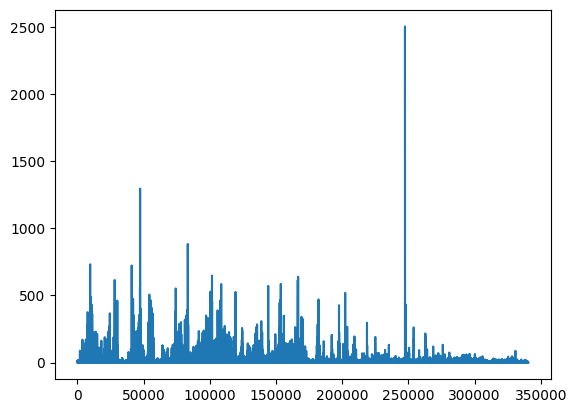

In [4]:

# add your code here - consider creating a new cell for each section of code
#plotting data

mask3 = df_ratings.groupby('user')['rating'].count().reset_index()
mask4 = df_ratings.groupby('isbn')['rating'].count().reset_index()


fig, ax = plt.subplots()
ax.plot(mask4.index, mask4.rating)
plt.show()

<BarContainer object of 727 artists>

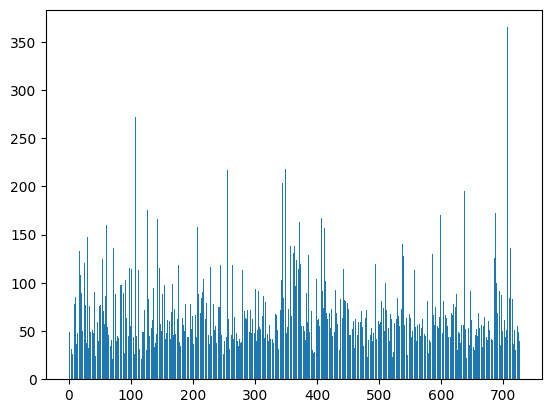

In [149]:
#cleaning data

df = df_ratings

counts1 = df['user'].value_counts()
counts2 = df['isbn'].value_counts()

df = df[~df['user'].isin(counts1[counts1 < 200].index)]
df = df[~df['isbn'].isin(counts2[counts2 < 100].index)]

merged = pd.merge(right=df, left = df_books, on="isbn")

merged = merged.drop_duplicates(['title','user'], keep='first')

mask3 = merged.groupby('user')['rating'].count().reset_index()
mask4 = merged.groupby('isbn')['rating'].count().reset_index()



fig, ax = plt.subplots()
ax.bar(mask4.index, mask4.rating)

In [150]:
feat = merged.pivot(index='title', columns='user', values='rating')
feat = feat.fillna(0)
print(feat.shape)

neigh = NearestNeighbors(n_neighbors=5, metric='cosine')
neigh.fit(feat)


(673, 888)


NearestNeighbors(metric='cosine')

In [155]:
# function to return recommended books - this will be tested
def get_recommends(book = ""):
  selection = feat.loc[book].array.reshape(1,-1)
  distances, list_knn = neigh.kneighbors(selection, return_distance=True)
  list_knn = list_knn[0]
  names = np.array(feat.iloc[list_knn].index)
  r_books = []
  for i in range(len(distances[0])):
    if names[i] != "Where the Heart Is (Oprah's Book Club (Paperback))":
      r_books.append([names[i], distances[0][i]])


  recommended_books = [book, r_books[::-1]]
  return recommended_books

In [156]:
books = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
print(books)

def test_book_recommendation():
  test_pass = True
  recommends = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
  if recommends[0] != "Where the Heart Is (Oprah's Book Club (Paperback))":
    test_pass = False
  recommended_books = ["I'll Be Seeing You", 'The Weight of Water', 'The Surgeon', 'I Know This Much Is True']
  recommended_books_dist = [0.8, 0.77, 0.77, 0.77]
  for i in range(2):
    if recommends[1][i][0] not in recommended_books:
      test_pass = False
    if abs(recommends[1][i][1] - recommended_books_dist[i]) >= 0.05:
      test_pass = False
  if test_pass:
    print("You passed the challenge! 🎉🎉🎉🎉🎉")
  else:
    print("You haven't passed yet. Keep trying!")

test_book_recommendation()

["Where the Heart Is (Oprah's Book Club (Paperback))", [['The Weight of Water', 0.7708583572697412], ['The Surgeon', 0.7699410973804288], ['I Know This Much Is True', 0.7677075092617776], ['The Lovely Bones: A Novel', 0.7234864549790632]]]
You passed the challenge! 🎉🎉🎉🎉🎉
